# Recuit Simulé
## Exemple sur le voyageur de commerce

Le principe du recuit simulé vise à éviter les minima locaux. Tant que la température est élevée, on cherche des solutions autour de la dernière solution trouvée.

On garde la valeur de la nouvelle solution si elle est meilleure, ou selon une probabilité dépendant de température et de la dégradation de solution par rapport à la dernière solution trouvée.


In [2]:
#quelques imports "classiques"
import numpy as np
import random
import matplotlib.pyplot as plt

## Problème
Prenons 10 villes. 
L'objectif est pour une personne de visiter ces 10 villes en minimisant le nombre de kilomètres parcourus.


In [29]:
#  distances entre les villes (matrice de distance symétrique)
mat_distances = np.array([
    [ 0, 4, 9, 2, 6, 3, 7, 8, 6, 3],
    [ 4, 0, 5, 9, 9, 5, 8, 3, 6, 8],
    [ 9, 5, 0, 8, 3, 10, 6, 9, 3, 5],
    [ 2, 9, 8, 0, 2, 1, 5, 10, 2, 8],
    [ 6, 9, 3, 2, 0, 6, 1, 2, 7, 10],
    [ 3, 5, 10, 1, 6, 0, 2, 2, 10, 5],
    [ 7, 8, 6, 5, 1, 2, 0, 1, 4, 5],
    [ 8, 3, 9, 10, 2, 2, 1, 0, 2, 8],
    [ 6, 6, 3, 2, 7, 10, 4, 2, 0, 1],
    [ 3, 8, 5, 8, 10, 5, 5, 8, 1, 0]])

# Nombre de villes
nb_villes = mat_distances.shape[0]

### Evaluer une solution
Ici on calcule la somme des distances entre chaque ville d'un chemin.

In [30]:
# retourne la distance du chemin indiqué dans la liste path (ex. [1,4,3,2])
def distance_totale(path):
    return sum(mat_distances[path[i], path[i-1]] for i in range(nb_villes))


##  Générer des solutions
Pour générer une solution voisine d'un chemin, on échange juste la position de 2 villes dans ce chemin.

In [40]:
# Fonction pour générer une solution voisine en échangeant deux villes
def generer_solution_voisine(path):
    new_path = path.copy()
    i = random.randint(0, nb_villes-1)
    j = (i+nb_villes//3)%nb_villes
    new_path[i], new_path[j] = new_path[j], new_path[i]
    return new_path

---
## Recuit simulé
Tant que la "température" est élevée : 
- générer une solution proche de la solution courante,
- garder la valeur obtenue : 
    - si la solution est meilleure
    - ou avec une probabilité dépendant de la chaleur de la température et de la dégradation. On choisit $e^\frac{-distance}{temperature}$ 


C:\Users\emmanuel adam\AppData\Local\Temp\ipykernel_24564\396643901.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  ys = [np.exp(-2/x) for x in xs]


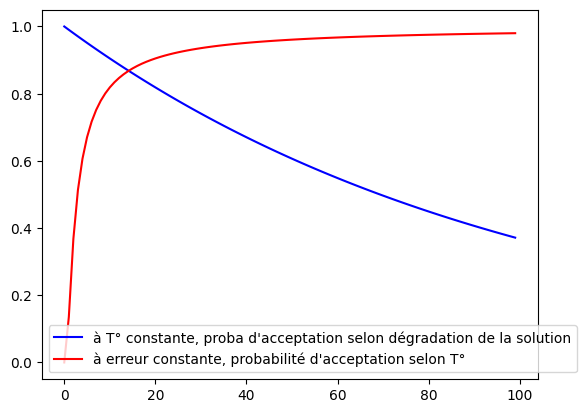

In [32]:
xs = np.arange(100)
ys = [np.exp(-x/100) for x in xs]
plt.plot(xs,ys, "b", label="à T° constante, proba d'acceptation selon dégradation de la solution")
ys = [np.exp(-2/x) for x in xs]
plt.plot(xs,ys, "r", label="à erreur constante, probabilité d'acceptation selon T°")
plt.legend()

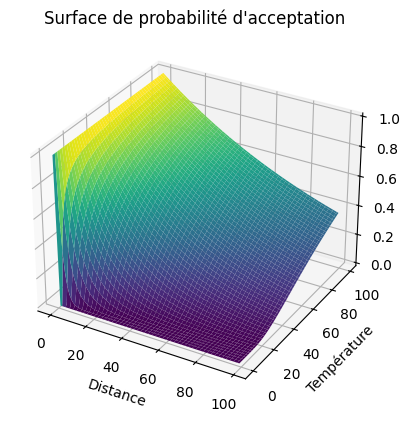

In [33]:
#dessiner une courbe 3D dépendant de température et de la distance
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = np.arange(0, 100, 1)
Y = np.arange(0, 100, 1)
X, Y = np.meshgrid(X, Y)
Z = np.exp(-X/(Y+0.00000001))
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.ylabel('Température')
plt.xlabel('Distance')
plt.title('Surface de probabilité d\'acceptation')
plt.show()

### Principe du recuit simulé
- On part d'une solution arbitraire, d'une température initiale.
- Tant que la température est au-dessus d'un seuil donnée, 
  - on génère une solution voisine de la dernière
  - on calcule sa valeur
  - on la garde si elle est meilleur ou selon la proba décrite précédemment
  - on fait diminuer la température.

In [118]:
# Fonction de recuit simulé
def recuit_simule(temp_initiale, reduc_temp, seuil_temp):
    # Solution initiale aléatoire
    solution_actuelle = np.random.permutation(nb_villes)
    distance_actuelle = distance_totale(solution_actuelle)
    best_solution = solution_actuelle
    best_distance = distance_actuelle
    
    # Initialisation de la température
    temperature = temp_initiale
    
    # Liste pour stocker les distances au fil des itérations
    distances = []
    
    # Boucle principale du recuit simulé
    while temperature > seuil_temp:
#        for _ in range(nb_tests):
            # Générer une solution voisine
            neighbor_solution = generer_solution_voisine(solution_actuelle)
            neighbor_distance = distance_totale(neighbor_solution)
            
            # Calculer la différence de distance
            distance_diff = neighbor_distance - distance_actuelle
            
            # Accepter la nouvelle solution si elle est meilleure ou selon une certaine probabilité
            if distance_diff < 0 or random.uniform(0, 1) < np.exp(-distance_diff / temperature):
                current_solution = neighbor_solution
                distance_actuelle = neighbor_distance
                
                # Mettre à jour la meilleure solution trouvée
                if distance_actuelle < best_distance:
                    best_solution = current_solution
                    best_distance = distance_actuelle            
            # Stocker la distance actuelle
            distances.append(distance_actuelle)
        
        # Réduire la température
            temperature *= reduc_temp
    
    return best_solution, best_distance, distances


---
### Tests
Partons de $10000°$ pour descendre à $1°$ et vérifions les distances calculées.


In [119]:
# Paramètres du recuit simulé
temp_depart = 10000
temp_reduction = 0.99
temp_fin = 1

In [120]:
# Exécuter le recuit simulé
best_solution, best_distance, distances = recuit_simule(temp_depart, temp_reduction, temp_fin)
print("Meilleure solution:", best_solution)
print("Distance totale:", best_distance)


Meilleure solution: [5 1 2 4 3 6 7 0 8 9]
Distance totale: 41


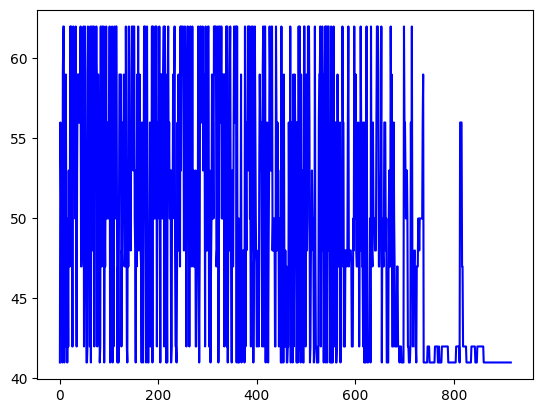

In [121]:
# Afficher la distance au fil des itérations du recuit simulé pour vérifier la convergence
xs = range(len(distances))
plt.plot(xs, distances, "b")

---
Dû au caractère aléatoire et peu guidé de l'algorithme de base, il est nécessaire de relancer plusieurs fois l'algorithme pour tenter d'obtenir une meilleure solution.